In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [32]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


# **Data Cleaning**

In [33]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015
...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019


In [34]:
df.duplicated().sum()

0

In [35]:
df.isnull().sum()

month                           0
line                            0
division                        0
day_type                        0
num_on_time_trips               0
num_sched_trips                 0
terminal_on_time_performance    0
date                            0
year                            0
dtype: int64

Filter for only 7 train line info

In [36]:

df = df[df['line'] == '7']
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year
6,1,7,A DIVISION,1,10595,12322,0.859844,2015-01-01,2015
30,2,7,A DIVISION,1,9057,11727,0.772320,2015-02-01,2015
54,3,7,A DIVISION,1,10949,13571,0.806794,2015-03-01,2015
78,4,7,A DIVISION,1,10597,13293,0.797186,2015-04-01,2015
102,5,7,A DIVISION,1,10280,12345,0.832726,2015-05-01,2015
...,...,...,...,...,...,...,...,...,...
1537,10,7,A DIVISION,2,2431,2914,0.834248,2019-10-01,2019
1583,11,7,A DIVISION,1,12081,13081,0.923553,2019-11-01,2019
1584,11,7,A DIVISION,2,3563,3792,0.939610,2019-11-01,2019
1630,12,7,A DIVISION,1,12163,13646,0.891323,2019-12-01,2019


In [37]:
performance = df.groupby(['year'])['terminal_on_time_performance'].mean()
performance = performance[~performance.index.isin(['Systemwide'])]
performance = performance.sort_values(ascending=False)
performance

year
2019    0.902893
2015    0.828808
2016    0.774784
2017    0.724906
2018    0.682597
Name: terminal_on_time_performance, dtype: float64

In [38]:
performance = df.groupby(['day_type'])['terminal_on_time_performance'].mean()
performance = performance[~performance.index.isin(['Systemwide'])]
performance = performance.sort_values(ascending=False)
performance

day_type
2    0.899310
1    0.783335
Name: terminal_on_time_performance, dtype: float64

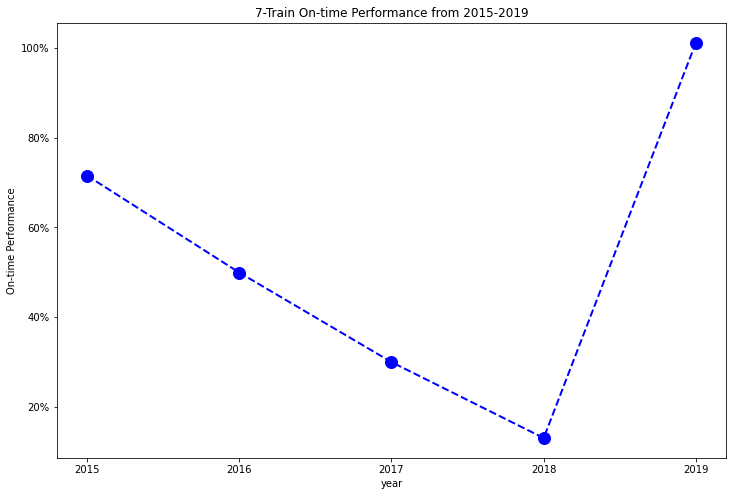

In [42]:
plt.figure(figsize=(12, 8))
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.xlabel('Year')
plt.ylabel('On-time Performance')
plt.title('7-Train On-time Performance from 2015-2019')
plt.xticks(df['year'].unique())
df.groupby(['year'])['terminal_on_time_performance'].mean().plot(kind='line', color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()

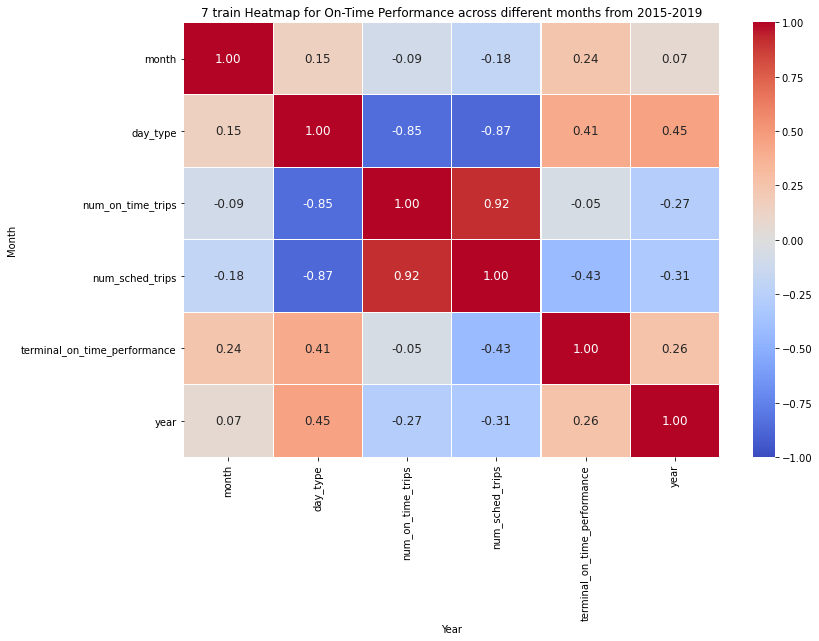

In [48]:
plt.figure(figsize=(12, 8))
plt.title('7 train Heatmap for On-Time Performance across different months from 2015-2019')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.2, annot_kws={'size': 12}, fmt='.2f')
plt.xlabel('Year')
plt.ylabel('Month')
# plt.savefig('../static/images/7-train-heatmap.png')
plt.show()